# Improving your data visualization

## Highlight your data

### Introduction

**Load dataset**

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load dataset
pollution = pd.read_csv('/content/drive/My Drive/Colab Notebooks/pollution_us_2000_2016.csv')
pollution = pollution.drop(['Unnamed: 0','State Code','County Code','Site Num','NO2 Units','O3 Units','SO2 Units','CO Units', 'Address'],axis=1)
pollution.head()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,1.145833,4.2,21,NaN
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,0.878947,2.2,23,25.0
2,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,1.145833,4.2,21,NaN
3,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,0.878947,2.2,23,25.0
4,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,10,27,1.958333,3.0,22,4.0,0.850000,1.6,23,NaN


> Each row of the data contains the maximum observed air-pollution values for four different pollutants: carbon monoxide( 𝐶𝑂 ),nitrogen dioxide( 𝑁𝑂2 ), ozone( 𝑂3 ), and sulfur dioxide( 𝑆𝑂2 ). 

**Simple data processing**

In [4]:
pollSt = pollution[['City','Date Local','NO2 1st Max Value', 'NO2 AQI','O3 1st Max Value','O3 AQI','SO2 1st Max Value','SO2 AQI','CO 1st Max Value','CO AQI']]
pollSt = pollSt.dropna(axis='rows')  # Delete rows with NAs

# Group the data via each date of every city, i.e. Use the mean value of the same date.
pollSt = pollSt.groupby(['City','Date Local']).mean().round(3)

pollSt = pollSt.reset_index(drop=False)
pollSt.head()

,City,Date Local,NO2 1st Max Value,NO2 AQI,O3 1st Max Value,O3 AQI,SO2 1st Max Value,SO2 AQI,CO 1st Max Value,CO AQI
0,Albuquerque,2011-01-01,20.4,19.0,0.035,30.0,0.4,0.0,0.2,2.0
1,Albuquerque,2011-01-02,40.3,38.0,0.033,28.0,1.9,1.0,0.6,7.0
2,Albuquerque,2011-01-03,47.2,44.0,0.017,14.0,2.7,3.0,1.1,13.0
3,Albuquerque,2011-01-04,35.5,33.0,0.035,30.0,3.1,4.0,1.1,13.0
4,Albuquerque,2011-01-05,28.8,26.0,0.035,30.0,0.9,0.0,0.3,3.0


In [5]:
# extract Y/M/D and add three columns
pollSt['Year'] = pollSt['Date Local'].str.split('-').str.get(0)
pollSt['Month'] = pollSt['Date Local'].str.split('-').str.get(1)
pollSt['Day'] = pollSt['Date Local'].str.split('-').str.get(2)
pollSt.head() 

,City,Date Local,NO2 1st Max Value,NO2 AQI,O3 1st Max Value,O3 AQI,SO2 1st Max Value,SO2 AQI,CO 1st Max Value,CO AQI,Year,Month,Day
0,Albuquerque,2011-01-01,20.4,19.0,0.035,30.0,0.4,0.0,0.2,2.0,2011,01,01
1,Albuquerque,2011-01-02,40.3,38.0,0.033,28.0,1.9,1.0,0.6,7.0,2011,01,02
2,Albuquerque,2011-01-03,47.2,44.0,0.017,14.0,2.7,3.0,1.1,13.0,2011,01,03
3,Albuquerque,2011-01-04,35.5,33.0,0.035,30.0,3.1,4.0,1.1,13.0,2011,01,04
4,Albuquerque,2011-01-05,28.8,26.0,0.035,30.0,0.9,0.0,0.3,3.0,2011,01,05


In [6]:
pollSt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359089 entries, 0 to 359088
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   City               359089 non-null  object 
 1   Date Local         359089 non-null  object 
 2   NO2 1st Max Value  359089 non-null  float64
 3   NO2 AQI            359089 non-null  float64
 4   O3 1st Max Value   359089 non-null  float64
 5   O3 AQI             359089 non-null  float64
 6   SO2 1st Max Value  359089 non-null  float64
 7   SO2 AQI            359089 non-null  float64
 8   CO 1st Max Value   359089 non-null  float64
 9   CO AQI             359089 non-null  float64
 10  Year               359089 non-null  object 
 11  Month              359089 non-null  object 
 12  Day                359089 non-null  object 
dtypes: float64(8), object(5)
memory usage: 35.6+ MB


In [7]:
# nunique() - return the number of unique cities
# unique() - return the list of unique years
pollSt.City.nunique(), pollSt.Year.unique()

(144, array(['2011', '2012', '2013', '2014', '2015', '2000', '2006', '2007',
        '2008', '2009', '2010', '2001', '2002', '2003', '2004', '2005',
        '2016'], dtype=object))

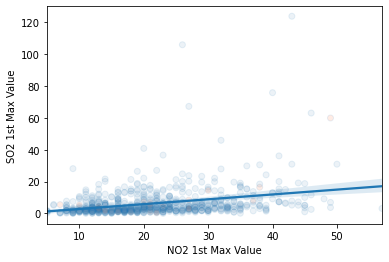

In [8]:
cinci_pollution = pollSt[(pollSt.City == 'Cincinnati') & ((pollSt.Year == '2014')|(pollSt.Year =='2015')|(pollSt.Year =='2016'))] 

# Make an array of colors based upon if a row is a given day
# Go through each row
cinci_colors = ['orangered' if day == '04' else 'steelblue'
                 for day in cinci_pollution.Day]

p = sns.regplot(x = 'NO2 1st Max Value',
        y = 'SO2 1st Max Value',
        data = cinci_pollution,
        fit_reg = True,       # regression
        scatter_kws = {'facecolors': cinci_colors, 'alpha': 0.1})

> In this case, the point corresponding to the 4th day of every month.

> To highlight a point in Seaborn or matplotlib, we supply our plotting function with a vector of colors corresponding to each row of our data, making a vector with uniform colors for every point except the ones we want to hightlight.

> We can see our specific point clearly now.

Those familiar with matplotlib may ask why we aren't just drawing a second scatter plot of just our highlighted points. By using an array-based method, we can easily add more highlights to the plot or generate the highlights programmatically.

#### Exercise:Hardcoding a highlight
You are working with the city of Houston to look at the relationship between sulfur dioxide ($SO_2$) and nitrogen dioxide ($NO_2$) pollution, specifically, pollution in the year data was collected (2000). You have singled out a particularly bad day, $Oct.14^{th}$, where there was a bad spike in the SO2 levels. To draw the viewers attention to this bad day, you will highlight it in a bright orangish-red and color the rest of the points gray.

In [9]:
houston_pollution = pollSt[pollSt.City == 'Houston']
houston_pollution[['SO2 1st Max Value']].idxmax(axis=0) # return the index of the max value

SO2 1st Max Value    163888
dtype: int64

`.loc()` --> by index 

`iloc()` --> by location

In [10]:
[1, 2, 3, 4][1:2]

[2]

In [11]:
houston_pollution.loc[163888:163888,:]

,City,Date Local,NO2 1st Max Value,NO2 AQI,O3 1st Max Value,O3 AQI,SO2 1st Max Value,SO2 AQI,CO 1st Max Value,CO AQI,Year,Month,Day
163888,Houston,2000-10-14,38.0,36.0,0.044,37.0,237.0,172.0,0.4,5.0,2000,10,14


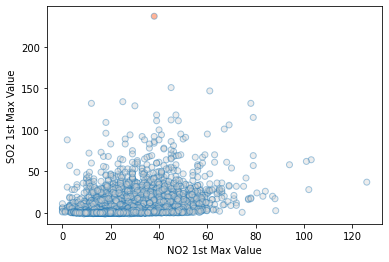

In [12]:
houston_colors = ['orangered' if date == '2000-10-14' else 'lightgray' 
                  for date in houston_pollution['Date Local']]

sns.regplot(x = 'NO2 1st Max Value',
      y = 'SO2 1st Max Value',
      data = houston_pollution,
      fit_reg = False, 
     # Send scatterplot argument to color points 
      scatter_kws = {'facecolors': houston_colors, 'alpha': 0.4})

#### Exercise: Programmatically creating a highlight

You are continuing your work for the city of Houston. Now you want to look at the behavior of both NO2 and SO2 when the un-plotted ozone (CO) value was at its highest.

> Note: use `sns.scatterplot()` instead of `sns.regplot()`. This is because `sns.scatterplot()` can take a non-color vector as its hue argument and colors the points automatically while providing a helpful legend.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


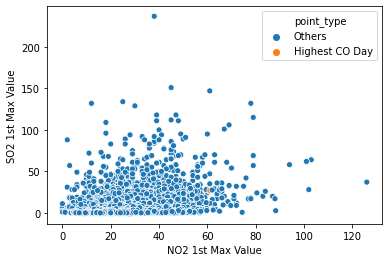

In [13]:
# houston_pollution = pollSt[pollSt.City  ==  'Houston'].copy()

# Find the highest observed CO value
max_CO = houston_pollution['CO 1st Max Value'].max()

# Make a column that denotes which day had highest O3
houston_pollution['point_type'] = ['Highest CO Day' if CO == max_CO else 'Others' 
                    for CO in houston_pollution['CO 1st Max Value']]

# Encode the hue of the points with the CO generated column
sns.scatterplot(x = 'NO2 1st Max Value',
        y = 'SO2 1st Max Value',
        hue = 'point_type',
        data = houston_pollution)

### Comparing groups

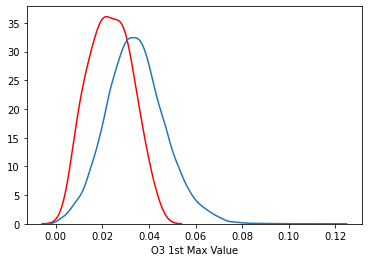

In [14]:
# Using kernel density estimation, normally show 2-3 groups
pollution_sep = pollSt[pollSt.Month == '10'] 
sns.distplot(pollution_sep[pollution_sep.City == 'Denver']['O3 1st Max Value'], 
             hist=False, 
             color = 'red') 
sns.distplot(pollution_sep[pollution_sep.City != 'Denver']['O3 1st Max Value'], 
             hist=False) 

> The two curves clearly show a difference in the shape of the 2 groups distribution's, with the $\color{red}{red}$ Denver curves, shifted to the left from the rest of the cities.

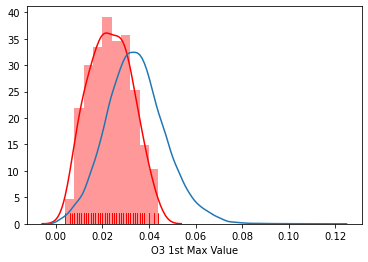

In [15]:
# Enable rugplot, show the original data distribution
sns.distplot(pollution_sep[pollution_sep.City == 'Denver']['O3 1st Max Value'],
             hist=True, color='red', rug=True )
sns.distplot(pollution_sep[pollution_sep.City != 'Denver']['O3 1st Max Value'],
             hist=False)

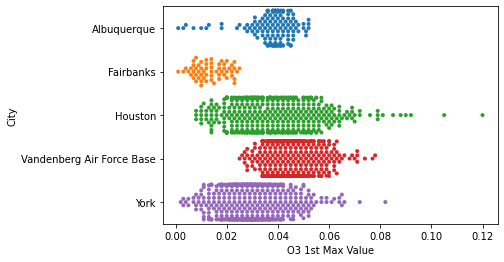

In [16]:
# Using beeswarm plot to show many groups
sns.swarmplot(y = "City", x = "O3 1st Max Value", 
       data = pollution_sep[(pollution_sep.City=='York')\
                 |(pollution_sep.City=='Albuquerque')\
                 |(pollution_sep.City=='Houston')\
                 |(pollution_sep.City=='Fairbanks')\
                 |(pollution_sep.City=='Vandenberg Air Force Base')], 
       size = 4)
# plt.xlabel("Ozone (O3)")

As a result of the small jostling to get points closer together we end up having the 'swarms' of points that give the viewer a sense of the distributional shape.

Here we use Seaborn's `swarmplot()` function to make a beeswarm plot. You can see how the city of Fairbanks has slightly lower values than the rest, Vandenberg Air Force Base has higher, and Houston is the most variable.

#### Exercise: Comparing with two KDEs
Imagine that you work for the premier air-filter provider. Your company has asked you to build a report that looks into why 2013 was a particularly good year for sales of your ozone ($O_3$) filter. You downloaded some helpful pollution data from the USGS, and you want to make a concise visualization that compares the general pattern of $O_3$ pollution for 2013 to all other years on record.

To do this, you can build two overlaid kernel density estimation plots (KDEs): one for 2013 $O_3$ data and one for all other years.

In [0]:
pollSt = pollSt[(pollSt.City=='Boston')\
                |(pollSt.City=='Cincinnati')\
                |(pollSt.City=='Denver')\
                |(pollSt.City=='Des Moines')\
                |(pollSt.City=='Fairbanks')\
                |(pollSt.City=='Houston')\
                |(pollSt.City=='Indianapolis')\
                |(pollSt.City=='Long Beach')\
                |(pollSt.City=='New York')\
                |(pollSt.City=='Salt Lake City')\
                |(pollSt.City=='Vandenberg Air Force Base')]

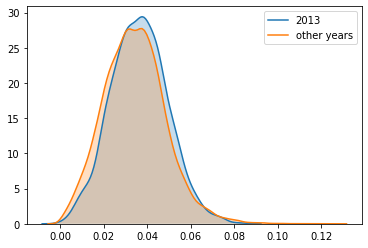

In [18]:
# Filter dataset to the year 2013
sns.kdeplot(pollSt[pollSt.Year == '2013']['O3 1st Max Value'], 
            # Shade under kde and add a helpful label
            shade = True,
            label = '2013')

# Filter dataset to everything except the year 2013
sns.kdeplot(pollSt[pollSt.Year != '2013']['O3 1st Max Value'],
            # Again, shade under kde and add a helpful label
            shade = True,
            label = 'other years')

> From this plot, we can see that **2013 had slightly higher** than typical $O_3$ levels, which may explain the filter sales. However, keen observers will note that some of our cities don't have full data for 2013, which could skew the trends. Next up we will look at techniques that can help out KDE's be more honest about this lack of data.

#### Exercise: Improving your KDEs

One way of enhancing KDEs is **with the addition of a rug plot**. Rug plots are little dashes drawn beneath the density that show precisely where each data point falls. Adding a rug plot is particularly useful **when you don't have a ton of data**.

With small amounts of data you often have gaps along your support with no data, and it can be hard to tell whether a non-zero KDE line means data was present or is due to a wide kernel. A rug plot helps address this.

Let's return to the `sns.distplot()` function to draw two KDEs: one looking at the data for Vandenberg Air Force Base and the other looking at all the other cities in the pollution data. Since there is much less data contributing to the shape of the Vandenberg plot, add a rug plot beneath it.

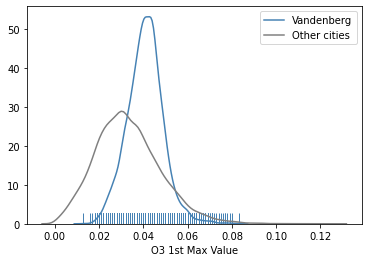

In [19]:
sns.distplot(pollSt[pollSt.City == 'Vandenberg Air Force Base']['O3 1st Max Value'], 
             label = 'Vandenberg', 
             # Turn off the histogram and color blue to stand out
             hist = False,
             color = 'steelblue', 
             # Turn on rugplot
             rug = True)

sns.distplot(pollSt[pollSt.City != 'Vandenberg Air Force Base'][['O3 1st Max Value']], 
             label = 'Other cities',
             # Turn off histogram and color gray
             hist = False,  
             color = 'gray')

> Rug plots can improve KDEs as they help you **see those gaps** that you may have otherwise assumed were filled with data. In this plot, the rug plot shows that there is a small, but not neglible gap, in the data around $O_3$ = 0.065.

#### Exercise: Beeswarms

Build a beeswarm plot using `sns.swarmplot()` that looks at the Ozone levels for all the cities in the pollution data for the month of March. To make the beeswarm a bit more legible, decrease the point size to avoid the overcrowding caused by the many points drawn on the screen. Last, since you've done some manipulation of the data to make this plot, provide a title to help the reader orient with what they are viewing.

Text(0.5, 1.0, 'March Ozone levels by city')

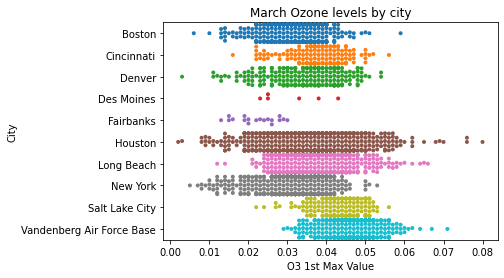

In [20]:
# Filter data to just March
pollution_mar = pollSt[pollSt.Month == '03']

# Plot beeswarm with x as O3
sns.swarmplot(y = "City",
              x = 'O3 1st Max Value', 
              data = pollution_mar,
              # Decrease the size of the points to avoid crowding 
              size = 4)

# Give a descriptive title
plt.title('March Ozone levels by city')

>Beeswarms are a nice (and nice looking) way of comparing a bunch of classes to each other. In the plot, you can see that Vandenberg on average has high $O_3$ levels in March. However, Houston has a much wider range and can sometimes reach much higher levels.

>Additionally, you can also get a sense of data quantities. Here, you see that Des Moines and Fairbanks have far fewer observations than the other sites.

### Annotation

Text(40, 220, 'Look at this outlier')

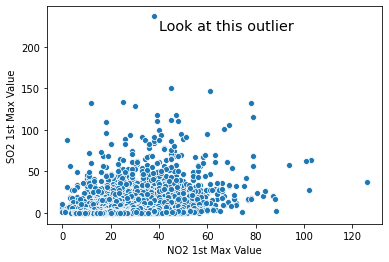

In [21]:
sns.scatterplot(x='NO2 1st Max Value', y='SO2 1st Max Value', data = houston_pollution)

# X and Y location of outlier and text 
plt.text(40,220,'Look at this outlier',           
         # Text properties for alignment and size.           
         fontdict = {'ha': 'left', 'size': 'x-large'})

> Just supply the x and y locations of the text, the test body, and the text alignment.

> It's amazing how something as simple as adding a bit of text on a plot can take it from something the reader mindlessly scans to a learning experience. Here we have managed to convey the large-scale relationship of the two pollutants while also giving the viewer a glimpse into an outlier.

Text(80, 150, 'A buried point to look at')

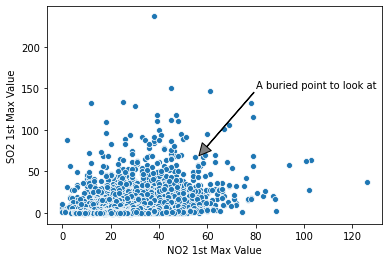

In [22]:
sns.scatterplot(x='NO2 1st Max Value', y='SO2 1st Max Value', data = houston_pollution)
# Arrow start and annotation location 
plt.annotate('A buried point to look at', xy=(56.5,68.8), xytext=(80,150),   
             # Arrow configuration and background box   
             arrowprops={'facecolor':'grey', 'width': 0.5} )

#### Exercise: Arrow annotations
Imagine you are a city planner for Long Beach, California. Long Beach is located on the Pacific Ocean and has a large firework show every New Year's Eve. You want to look into whether this show negatively impacts the air quality of the city. To do this, you will look at CO and NO2 levels on New Year's Day. However, it turns out that New Year's Day is not one of the outliers in the plot on the right, it's located in one of the more crowded areas.

To help guide the reader to this point, you'll use an annotation along with an arrow that points to the New Year's Day value. This will provide a nice annotation that explains what the viewer is looking while printing the text in a less crowded region of the plot

Text(1.8, 15, 'Long Beach New Years')

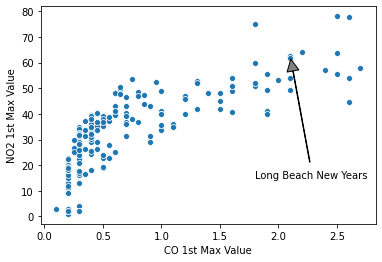

In [23]:
# Query and filter to New Years in Long Beach
jan_pollution = pollSt.query("(Month == '01') & (Year == '2012')")
lb_newyears = jan_pollution.query("(City == 'Long Beach') & (Day == '01')")

sns.scatterplot(x = 'CO 1st Max Value', y = 'NO2 1st Max Value',
                data = jan_pollution)

# Point arrow to lb_newyears & place text in lower left 
plt.annotate('Long Beach New Years',
             xy = (lb_newyears['CO 1st Max Value'], lb_newyears['NO2 1st Max Value']),
             xytext = (1.8, 15), 
             # Shrink the arrow to avoid occlusion
             arrowprops = {'facecolor':'gray', 'width': 0.5, 'shrink': 0.03},
             backgroundcolor = 'white')

> Using arrows with annotations is a great way to keep your text in a nice point-free area of the plot while precisely calling out a given point in a more-crowded location. In this plot, there is what appears to be a slightly higher than normal quantity of NO2 in the air compared to usual. The viewer's attention is driven to the point of interest at first rather than the more obvious outliers, thus kicking off their exploration of the chart in a guided way.

#### Exercise: Combining annotations and color
You believe that Long Beach, California has a smog problem. Using the pollution data, you'll attempt to make a point for increasing smog reduction regulations using your data visualization wizardry. Specifically, you want to focus on the relationship of CO to O3 levels during 2014 at a city council meeting.

To emphasize how Long Beach compares to a set of peer cities, you've decided to highlight Long Beach and draw attention to a particularly bad day where the CO level was 1.6 and O3 was 0.072 using an annotation.

Text(1.6, 0.072, 'April 30th, Bad Day')

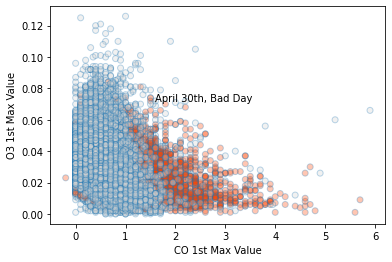

In [24]:
# Make a vector where Long Beach is orangered; else lightgray
is_lb = ['orangered' if city  ==  'Long Beach' else 'lightgray' for city in pollSt['City']]

# Map facecolors to the list is_lb and set alpha to 0.3
sns.regplot(x = 'CO 1st Max Value',
            y = 'O3 1st Max Value',
            data = pollSt,
            fit_reg = False,
            scatter_kws = {'facecolors':is_lb, 'alpha': 0.3})

# Add annotation to plot
plt.text(1.6, 0.072, 'April 30th, Bad Day')